In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

     | 2.1MB 926kB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for sklearn-extra: filename=sklearn_extra-0.0.3-cp36-cp36m-linux_x86_64.whl size=346271 sha256=def8a176e48206dc79565eb89f85b63516ad9acae7638365d085926ddf128c15
  Stored in directory: /tmp/pip-ephem-wheel-cache-0zeogiso/wheels/d3/a5/a8/411bc2d0939f2cc9d17f34f0d3457043c68e14a98b91fd8301
Successfully built sklearn-extra


In [0]:
original_dataset = pd.read_csv('data_class.csv')

In [0]:
attrs = [
    'id',
    'total_sales',
    'exempt_sales',
    'sgst_liability',
    'cgst_liability',
    'igst_liability',
    'total_liability',
    'sgst_cashsetoff',
    'cgst_cashsetoff',
    'igst_cashsetoff',
    'total_cashsetoff',
    'sgst_itc_claimed',
    'cgst_itc_claimed',
    'igst_itc_claimed',
    'total_itc_claimed'
]

In [41]:
original_dataset[attrs].describe()

,id,total_sales,exempt_sales,sgst_liability,cgst_liability,igst_liability,total_liability,sgst_cashsetoff,cgst_cashsetoff,igst_cashsetoff,total_cashsetoff,sgst_itc_claimed,cgst_itc_claimed,igst_itc_claimed,total_itc_claimed
count,98310.000000,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04
mean,5552.447554,6.992708e+07,1.059383e+06,3.488678e+05,3.488360e+05,2.441649e+05,9.418687e+05,5.027718e+04,2.698632e+04,3.390614e+04,1.111696e+05,2.706259e+05,2.709869e+05,3.331935e+05,8.748064e+05
std,3208.995358,1.945731e+10,5.397268e+07,2.232970e+06,2.233034e+06,3.421634e+06,6.331791e+06,8.005388e+05,3.427799e+05,6.966704e+05,1.338797e+06,1.959146e+06,1.962724e+06,3.458046e+06,6.309488e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2807.000000,1.516012e+05,0.000000e+00,8.613875e+03,8.621250e+03,0.000000e+00,2.654280e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.171680e+03,3.172370e+03,0.000000e+00,1.947850e+04
50%,5516.000000,5.701863e+05,0.000000e+00,3.994900e+04,3.995050e+04,0.000000e+00,1.013656e+05,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01,2.773083e+04,2.770950e+04,0.000000e+00,9.208107e+04
75%,8323.000000,1.772633e+06,0.000000e+00,1.277275e+05,1.277275e+05,1.277892e+04,3.146498e+05,2.900000e+03,1.800000e+03,0.000000e+00,1.222500e+04,1.018048e+05,1.017630e+05,3.692975e+04,2.893800e+05
max,11201.000000,6.100188e+12,5.898273e+09,1.727816e+08,1.727816e+08,3.064883e+08,4.154618e+08,7.282042e+07,3.210738e+07,6.359860e+07,9.067731e+07,2.151460e+08,2.151460e+08,2.079467e+08,6.379525e+08


In [6]:
original_dataset.shape

(98310, 16)

In [7]:
dataset = original_dataset.drop(original_dataset[original_dataset['total_liability'] == 0].index)
dataset.shape

(92025, 16)

In [8]:
dataset = dataset.drop(dataset[dataset['total_itc_claimed'] == 0].index)
dataset.shape

(85187, 16)

In [9]:
dataset[dataset['total_sales'] == 0]

,id,mnth,total_sales,exempt_sales,sgst_liability,cgst_liability,igst_liability,total_liability,sgst_cashsetoff,cgst_cashsetoff,igst_cashsetoff,total_cashsetoff,sgst_itc_claimed,cgst_itc_claimed,igst_itc_claimed,total_itc_claimed
16,4,32018,0.0,0.0,1485.0,1485.0,0.0,2970.0,1485.0,1485.0,0.0,2970.0,1485.00,1485.00,91746.0,94716.00
17,4,122017,0.0,0.0,1485.0,1485.0,0.0,2970.0,1485.0,1485.0,0.0,2970.0,1485.00,1485.00,0.0,2970.00
91,18,12018,0.0,0.0,1108.0,1108.0,0.0,2216.0,1108.0,1108.0,0.0,2216.0,536694.00,536694.00,307932.0,1381320.00
94,18,72017,0.0,0.0,79887.0,79887.0,0.0,159774.0,79887.0,79887.0,0.0,159774.0,28118.00,28118.00,74816.0,131052.00
100,18,102017,0.0,0.0,9022.0,9022.0,0.0,18044.0,9022.0,9022.0,0.0,18044.0,261395.00,261395.00,570835.0,1093625.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98077,11174,102017,0.0,0.0,110.0,110.0,0.0,220.0,110.0,110.0,0.0,220.0,75285.00,75285.00,0.0,150570.00
98079,11174,22018,0.0,0.0,325.0,325.0,0.0,650.0,325.0,325.0,0.0,650.0,105851.00,105851.00,0.0,211702.00
98081,11174,42018,0.0,0.0,950.0,950.0,0.0,1900.0,950.0,950.0,0.0,1900.0,280140.00,280140.00,0.0,560280.00
98119,11180,82017,0.0,0.0,200.0,200.0,0.0,400.0,200.0,200.0,0.0,400.0,2568.82,2568.82,0.0,5137.64


In [43]:
del dataset['mnth']
dataset = dataset.groupby(['id']).mean()
dataset

,total_sales,exempt_sales,sgst_liability,cgst_liability,igst_liability,total_liability,sgst_cashsetoff,cgst_cashsetoff,igst_cashsetoff,total_cashsetoff,sgst_itc_claimed,cgst_itc_claimed,igst_itc_claimed,total_itc_claimed
id,,,,,,,,,,,,,,
1,2.565797e+06,0.0,8.182866e+04,8.182866e+04,2.981861e+05,4.618434e+05,68745.142857,68675.142857,284130.857143,421551.142857,1.466838e+04,1.466838e+04,8.325857e+03,3.766261e+04
2,5.129100e+07,0.0,0.000000e+00,0.000000e+00,9.232380e+06,9.232380e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,9.232380e+06,9.232380e+06
4,0.000000e+00,0.0,1.485000e+03,1.485000e+03,0.000000e+00,2.970000e+03,1485.000000,1485.000000,0.000000,2970.000000,1.485000e+03,1.485000e+03,4.587300e+04,4.884300e+04
7,1.742512e+06,0.0,1.045505e+05,1.045505e+05,0.000000e+00,2.091010e+05,0.000000,0.000000,0.000000,0.000000,1.045505e+05,1.045505e+05,0.000000e+00,2.091010e+05
8,6.026978e+07,0.0,2.176186e+06,2.176186e+06,0.000000e+00,4.352373e+06,0.000000,0.000000,0.000000,0.000000,2.176186e+06,2.176186e+06,0.000000e+00,4.352373e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11195,1.595692e+05,0.0,1.427957e+04,1.427957e+04,1.650000e+02,2.872414e+04,7955.583333,2979.500000,0.000000,10935.083333,5.260167e+03,5.260167e+03,8.147917e+03,1.866825e+04
11197,4.367467e+05,0.0,3.382600e+04,3.382600e+04,2.837911e+04,9.603111e+04,636.111111,636.111111,0.000000,1272.222222,4.513845e+04,4.513845e+04,2.391226e+04,1.141892e+05
11199,3.164098e+05,0.0,4.429743e+04,4.429743e+04,0.000000e+00,8.859486e+04,0.000000,0.000000,0.000000,0.000000,4.622898e+04,4.622898e+04,0.000000e+00,9.245796e+04


### Performing Benford Analysis on individual attributes

In [0]:
from math import log10

def benford_analysis(vals):
    # Expected Benford frequencies
    expected_freq = [round(len(vals) * log10(1 + 1/d)) for d in range(1, 10)]

    # Convert to scientific notation and get first digit
    first_digit = lambda x: int(('%e' % x)[0])

    # Get observed first digit frequencies
    observed_freq = [0] * 10
    for val in vals:
        observed_freq[first_digit(val)] += 1
    observed_freq = observed_freq[1:]

    print('Expected frequencies: ', expected_freq)
    print('Observed frequencies: ', observed_freq)

    mean_abs_dev = 1/(len(vals)*9) * sum([abs(obv-exp)
                                          for obv, exp in zip(observed_freq, expected_freq)])
    print('Mean absolute deviation: %.6lf' % mean_abs_dev)
    
    plt.plot(range(1, 10), expected_freq, label='Expected')
    plt.plot(range(1, 10), observed_freq, label='Observed')
    plt.legend(loc='upper right')
    plt.show()

					 TOTAL_SALES
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2834, 1524, 1142, 902, 767, 626, 567, 495, 446]
Mean absolute deviation: 0.003013


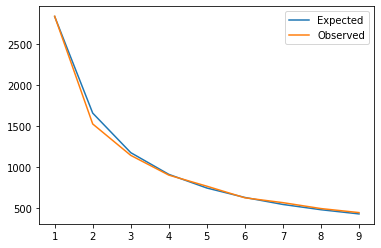



					 EXEMPT_SALES
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [264, 179, 118, 88, 68, 59, 57, 27, 52]
Mean absolute deviation: 0.100346


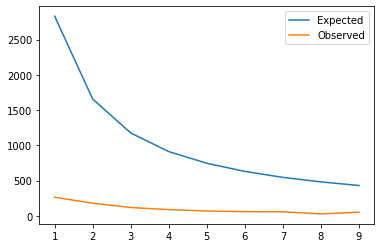



					 SGST_LIABILITY
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2794, 1583, 1153, 905, 735, 652, 564, 476, 449]
Mean absolute deviation: 0.002517


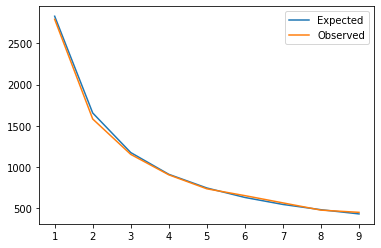



					 CGST_LIABILITY
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2794, 1582, 1153, 905, 734, 653, 564, 476, 450]
Mean absolute deviation: 0.002564


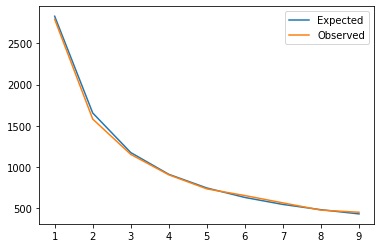



					 IGST_LIABILITY
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [1559, 917, 654, 489, 426, 353, 309, 267, 242]
Mean absolute deviation: 0.049488


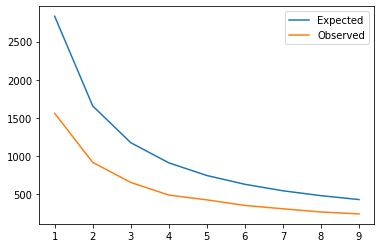



					 TOTAL_LIABILITY
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2899, 1673, 1150, 872, 716, 591, 571, 455, 476]
Mean absolute deviation: 0.003722


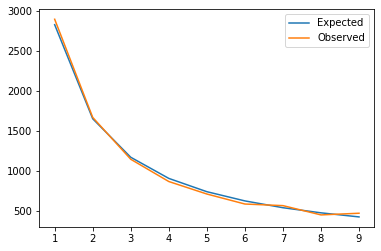



					 SGST_CASHSETOFF
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2342, 1508, 1023, 788, 640, 527, 465, 508, 377]
Mean absolute deviation: 0.015125


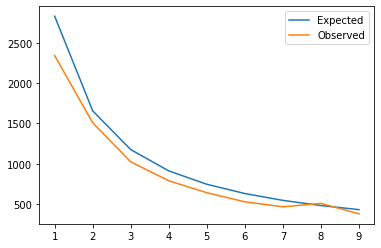



					 CGST_CASHSETOFF
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2343, 1491, 1002, 784, 648, 553, 488, 485, 369]
Mean absolute deviation: 0.014759


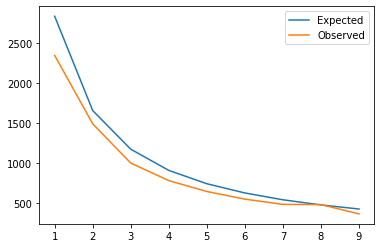



					 IGST_CASHSETOFF
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [858, 546, 357, 286, 226, 192, 161, 148, 123]
Mean absolute deviation: 0.076890


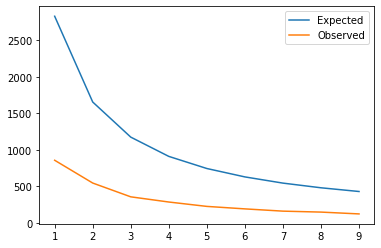



					 TOTAL_CASHSETOFF
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2607, 1429, 976, 851, 692, 602, 491, 422, 338]
Mean absolute deviation: 0.011769


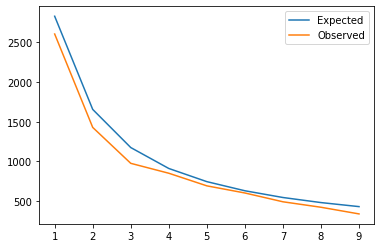



					 SGST_ITC_CLAIMED
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2759, 1526, 1137, 882, 745, 647, 538, 517, 462]
Mean absolute deviation: 0.004266


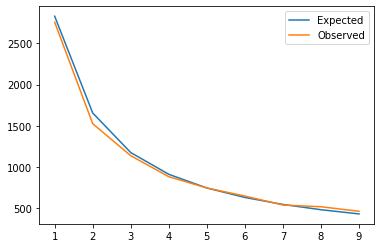



					 CGST_ITC_CLAIMED
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2757, 1522, 1141, 882, 745, 648, 540, 521, 460]
Mean absolute deviation: 0.004301


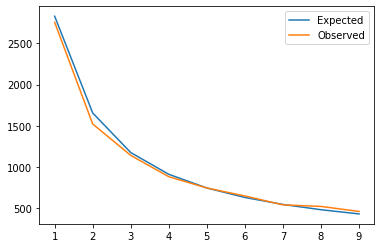



					 IGST_ITC_CLAIMED
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [1797, 1092, 746, 543, 481, 374, 354, 296, 277]
Mean absolute deviation: 0.040696


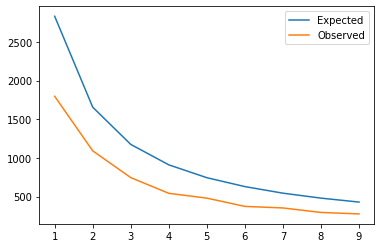



					 TOTAL_ITC_CLAIMED
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2912, 1712, 1099, 923, 727, 596, 540, 464, 430]
Mean absolute deviation: 0.003533


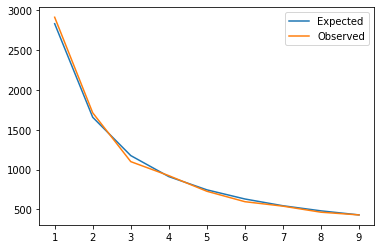

In [12]:
for attr in attrs:
    print('\t\t\t\t\t', attr.upper())
    benford_analysis(dataset[attr])
    print('\n')

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [0]:
correlation_parameter_pairs = [
    ('total_sales', 'total_liability'),
    ('total_liability', 'sgst_liability'),
    ('sgst_liability', 'sgst_cashsetoff'),
    ('total_sales', 'sgst_cashsetoff'),
    ('total_liability', 'total_itc_claimed'),
    ('total_itc_claimed', 'igst_itc_claimed')
]

ratio_parameter_pairs = [
    ('igst_itc_claimed', 'total_itc_claimed'),
    ('igst_itc_claimed', 'total_liability')
]

In [0]:
linear_reg_models = []
for variable_1, variable_2 in correlation_parameter_pairs:
    X = np.array(dataset[variable_1]).reshape(-1, 1)
    Y = np.array(dataset[variable_2])
    linear_reg_models.append(
        LinearRegression().fit(X, Y)
    )

In [0]:
def dist(linear_reg_model, x, y, dist_type='error_dist'):
    """Function to get distance from linear regression separating line"""
    if dist_type == 'error_dist':
        # abs(Prediction - True value)
        return abs((linear_reg_model.coef_[0]*x + linear_reg_model.intercept_) - y)
    
    if dist_type == 'min_dist':
        # minimum distance from the regression line
        return (
            abs(linear_reg_model.coef_[0]*x - y + linear_reg_model.intercept_)
            / (linear_reg_model.coef_[0]**2 + 1)**0.5
        )
    
    raise NotImplementedError('Invalid dist_type')

In [0]:
cols = [
    # 'id',
    # 'mnth',
    'correlation_1',
    'correlation_2',
    'correlation_3',
    'correlation_4',
    'correlation_5',
    'correlation_6',
    'ratio_1',
    'ratio_2'
]

In [0]:
modified_dataset = []
for data in dataset.values:
    # Put id and month without modification
    modified_data = []
    
    # Generating correlation params
    for i, (var1, var2) in enumerate(correlation_parameter_pairs):
        x = data[list(dataset.columns).index(var1)]
        y = data[list(dataset.columns).index(var2)]
        modified_data.append(
            dist(linear_reg_models[i], x, y, dist_type='error_dist')
        )
    
    # Generating ratio params
    for var1, var2 in ratio_parameter_pairs:
        x = data[list(dataset.columns).index(var1)]
        y = data[list(dataset.columns).index(var2)]
        modified_data.append(x/y)

    modified_dataset.append(modified_data)

In [0]:
modified_dataset = pd.DataFrame(
    data=modified_dataset,
    index=dataset.index,
    columns=cols
)

In [54]:
modified_dataset.describe()

,correlation_1,correlation_2,correlation_3,correlation_4,correlation_5,correlation_6,ratio_1,ratio_2
count,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9403.000000,9403.000000
mean,1.340572e+06,1.864145e+05,6.721399e+04,8.032557e+04,1.817390e+05,2.591939e+05,0.239194,4.983042
std,5.337196e+06,9.841838e+05,5.013731e+05,6.025994e+05,1.286122e+06,1.461778e+06,0.325430,425.112335
min,1.169777e+02,1.850649e-01,3.124967e+00,1.207235e+02,1.270757e+01,1.741573e+01,0.000000,0.000000
25%,6.846721e+05,5.197943e+04,7.777415e+03,4.302924e+04,1.166585e+04,4.522676e+04,0.000000,0.000000
50%,8.279814e+05,7.095939e+04,1.220433e+04,4.922327e+04,2.567464e+04,6.995646e+04,0.045916,0.037128
75%,8.940921e+05,8.038917e+04,2.247521e+04,4.984478e+04,6.573035e+04,1.029655e+05,0.416656,0.367592
max,2.237888e+08,3.545772e+07,3.406976e+07,4.443804e+07,4.723933e+07,6.308538e+07,1.000000,41205.118182


In [0]:
for col in cols:
    modified_dataset[col] -= modified_dataset[col].mean()
    modified_dataset[col] /= modified_dataset[col].std()

In [59]:
modified_dataset.describe()

,correlation_1,correlation_2,correlation_3,correlation_4,correlation_5,correlation_6,ratio_1,ratio_2
count,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03
mean,4.217280e-16,-2.779469e-16,-1.006616e-16,2.436693e-18,7.473313e-17,-5.713168e-17,7.164557e-16,-2.346596e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.511534e-01,-1.894101e-01,-1.340536e-01,-1.330981e-01,-1.412978e-01,-1.773023e-01,-7.350074e-01,-1.172171e-02
25%,-1.228923e-01,-1.365955e-01,-1.185476e-01,-6.189241e-02,-1.322371e-01,-1.463746e-01,-7.350074e-01,-1.172171e-02
50%,-9.604119e-02,-1.173106e-01,-1.097180e-01,-5.161355e-02,-1.213449e-01,-1.294571e-01,-5.939147e-01,-1.163437e-02
75%,-8.365442e-02,-1.077292e-01,-8.923252e-02,-5.058216e-02,-9.020032e-02,-1.068756e-01,5.453171e-01,-1.085701e-02
max,4.167885e+01,3.583812e+01,6.781884e+01,7.361061e+01,3.658874e+01,4.297931e+01,2.337848e+00,9.691588e+01


In [71]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=10, min_samples=2, metric='euclidean').fit(modified_dataset)

print(list(dbscan.labels_).count(-1))
print(np.bincount(kmeans.labels_))

13
[6853   12    1 2289    1   52    7    7  176    5]


In [65]:
# kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(modified_dataset)
print(np.bincount(kmeans.labels_))

print(modified_dataset[kmeans.labels_ == 1])
dataset[kmeans.labels_ == 1]

[6853   12    1 2289    1   52    7    7  176    5]
      correlation_1  correlation_2  ...   ratio_1   ratio_2
id                                  ...                    
20         8.763784       9.613813  ...  1.943665 -0.009949
105       12.143686      13.268121  ...  1.969569 -0.009704
155       12.933270      14.143507  ...  0.511370 -0.010633
288        9.089292       7.760741  ... -0.626171 -0.011645
327       16.093604      18.223165  ...  1.756266 -0.010293
389        7.336792       7.243001  ...  2.232724 -0.009711
595        8.690832      10.217323  ... -0.735007 -0.011722
613       10.932495      12.169129  ... -0.334925 -0.011419
827        7.194488       8.498969  ... -0.735007 -0.011722
910        7.165918       8.462689  ... -0.729733 -0.011718
1036      12.449950      14.521433  ...  0.011844 -0.011117
1568      11.488716      16.123247  ...  1.336742 -0.010521

[12 rows x 8 columns]


,total_sales,exempt_sales,sgst_liability,cgst_liability,igst_liability,total_liability,sgst_cashsetoff,cgst_cashsetoff,igst_cashsetoff,total_cashsetoff,sgst_itc_claimed,cgst_itc_claimed,igst_itc_claimed,total_itc_claimed
id,,,,,,,,,,,,,,
20,2.464728e+08,0.000000e+00,2.384730e+07,2.384730e+07,1.352860e+06,4.904745e+07,6.806375e+06,3.309391e+05,8.010125e+04,7.217415e+06,2.719105e+06,2.719105e+06,3.695536e+07,4.239357e+07
105,3.937490e+08,2.165792e+04,3.263756e+07,3.263756e+07,1.815486e+06,6.709061e+07,5.989237e+06,2.057728e+05,2.475616e+05,6.442572e+06,3.917969e+06,3.917969e+06,5.754585e+07,6.538179e+07
155,5.418446e+08,1.132782e+08,3.471331e+07,3.471331e+07,1.882148e+06,7.130876e+07,4.104245e+05,2.888634e+05,1.016875e+04,7.094567e+05,2.419007e+07,2.419007e+07,3.301432e+07,8.139445e+07
288,2.917881e+08,9.643791e+06,2.252397e+07,2.252397e+07,5.738035e+06,5.078598e+07,1.075601e+06,6.078290e+05,2.075756e+06,3.759186e+06,2.268451e+07,2.268607e+07,1.665976e+06,4.703656e+07
327,5.050202e+08,2.178332e+07,7.340725e+06,7.340725e+06,7.349364e+07,8.817509e+07,1.450861e+06,1.163541e+06,1.915584e+07,2.177024e+07,6.250929e+06,6.250929e+06,5.355311e+07,6.605496e+07
389,1.576450e+08,0.000000e+00,1.932098e+07,1.932098e+07,2.786981e+06,4.142894e+07,2.802976e+06,1.948358e+04,0.000000e+00,2.822459e+06,6.270535e+05,6.270535e+05,3.540438e+07,3.665849e+07
595,2.703263e+08,0.000000e+00,2.432937e+07,2.432937e+07,0.000000e+00,4.865874e+07,3.063714e+03,3.063714e+03,0.000000e+00,6.127429e+03,2.433076e+07,2.433076e+07,0.000000e+00,4.866151e+07
613,5.000987e+08,0.000000e+00,2.969600e+07,2.969600e+07,1.237113e+06,6.062911e+07,1.503385e+06,7.167692e+04,2.951500e+03,1.578014e+06,2.602469e+07,2.602469e+07,7.791175e+06,5.984056e+07
827,8.137413e+08,0.000000e+00,2.034353e+07,2.034353e+07,0.000000e+00,4.068706e+07,5.000000e+00,5.000000e+00,0.000000e+00,1.000000e+01,2.034353e+07,2.034353e+07,0.000000e+00,4.068706e+07


In [72]:
# k medoids
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=10, random_state=0).fit(modified_dataset)
print(np.bincount(kmedoids.labels_))

[ 522  953 1168 2549  104  235 1016  186  938 1732]


In [73]:
#Hierarchical
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering().fit(modified_dataset)
np.bincount(hierarchical.labels_)

array([9370,   33])

In [98]:
# Spectral
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=100,assign_labels="discretize",random_state=0, affinity='nearest_neighbors').fit(modified_dataset)
spectral.labels_

array([ 0, 28, 93, ..., 72, 44, 13])

In [99]:
np.bincount(spectral.labels_)

array([207,  75,  71, 112,  72,  99, 124,  97,  70,  54, 100, 100,  68,
        92, 153, 114,  76, 101,  61,  70,  77,  79,  86,  55, 132,  76,
        89,  91,  82,  56,  61,  66, 234,  81,  51,  99,  62, 130, 108,
       104, 108,  55,  80,  85,  70, 120,  85,  68,  68,  79,  65,  55,
       105,  86, 143,  74,  91, 138,  88,  74,  79,  71,  98,  72, 109,
        66, 113, 149,  78,  47, 104, 138,  79, 137, 138, 126,  89, 129,
       107,  73, 121,  62,  66,  88,  80, 104, 109, 118,  83,  59,  89,
        79, 211, 110, 101, 119, 103,  89, 101,  37])

In [95]:
np.bincount(spectral.labels_)

array([561, 470, 369, 486, 440, 168, 431, 530, 541, 436, 545, 433, 630,
       593, 752, 369, 262, 418, 428, 541])